In [1]:
from strava import *
file_name = 'strava_dataframe.pkl'

ModuleNotFoundError: No module named 'strava_secrets_request'

In [25]:
import pandas as pd
from datetime import datetime,timedelta
file_name = 'strava_dataframe.pkl'
if False:
    timestamp,distance_all,distance_month,distance_year,average_speed_month,average_distance_month,max_average_speed,rides = getStravaData()
    rides.to_pickle(file_name) 
rides = pd.read_pickle(file_name)
rides['average_speed'] = round(rides['average_speed'] *3.6,2)

In [8]:
#print(rides.head)
print(rides.columns)

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type',
       'device_name', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'average_temp', 'average_watts', 'device_watts',
       'kilojoules'],
      dtype='object')


In [26]:
now = datetime.now()
current_month = now.strftime("%Y-%m")
current_year = now.strftime("%Y")
current_month_rides = rides[rides['start_date_local'].str.contains(current_month, na=False)]
current_year_rides = rides[rides['start_date_local'].str.contains(current_year, na=False)]

In [27]:
sorted = current_year_rides.sort_values(by=['average_speed'], ascending=False)
print(sorted[['start_date_local', 'distance','average_speed','id']].head(3))

        start_date_local  distance  average_speed           id
1   2026-02-09T18:51:53Z   30427.0          25.34  17342450886
15  2026-01-21T11:04:06Z  101850.0          24.53  17127887005
18  2026-01-14T15:25:08Z   32496.3          23.55  17048206070


In [28]:
def sortDataframeByKey(df,key):
    df = df.sort_values(by=[key], ascending=False)
    return df

def getLeaderboardScoreByActivityID(df,currentID):
    #data = df.iloc[[df['id'] == currentID]]
    fastest = df['average_speed'].max()
    current = df[df['id'] == currentID]['average_speed'].max()
    speedDifference = fastest - current
    #data = df.iloc[:, 10] == currentID
    data = df.loc[:,'id'] == currentID
    booleanArray = data.to_numpy()
    for i,idx in enumerate(range(len(booleanArray))):
        if booleanArray[i] == True:
            return idx,len(booleanArray),speedDifference,fastest,current
    #data = df.index.get_loc(df[['id'] == currentID].index[0])
    return data

In [29]:
#print(getLeaderboardScore(sorted,17096086975))
currentID = 17096086975

sortedCurrentYear = sortDataframeByKey(current_year_rides,'average_speed')
sortedAllTime = sortDataframeByKey(rides,'average_speed')
dataframeID,totalRides, speedDifference, fastest,current = getLeaderboardScoreByActivityID(sortedCurrentYear,currentID)
topPerecent = round(((dataframeID+1) / totalRides) * 100)
print(f"Durchschnittsgeschwindigkeit \t {round(current,2)} km/h")
print(f"Dieses Jahr {current_year}  \t\t Platz: {dataframeID+1} von {totalRides}\t(Top {topPerecent} %) mit einer Geschwindigkeitsdifferenz zum Schnellsten ({round(fastest,2)} km/h) von {round(speedDifference,2)} km/h") 
dataframeID,totalRides, speedDifference, fastest,current = getLeaderboardScoreByActivityID(sortedAllTime,currentID)
topPerecent = round(((dataframeID+1) / totalRides) * 100)
print(f"Alltime  \t \t\t Platz: {dataframeID+1} von {totalRides}\t(Top {topPerecent} %) mit einer Geschwindigkeitsdifferenz zum Schnellsten ({round(fastest,2)} km/h) von {round(speedDifference,2)} km/h")

Durchschnittsgeschwindigkeit 	 20.69 km/h
Dieses Jahr 2026  		 Platz: 6 von 7	(Top 86 %) mit einer Geschwindigkeitsdifferenz zum Schnellsten (25.34 km/h) von 4.65 km/h
Alltime  	 		 Platz: 118 von 172	(Top 69 %) mit einer Geschwindigkeitsdifferenz zum Schnellsten (31.41 km/h) von 10.72 km/h


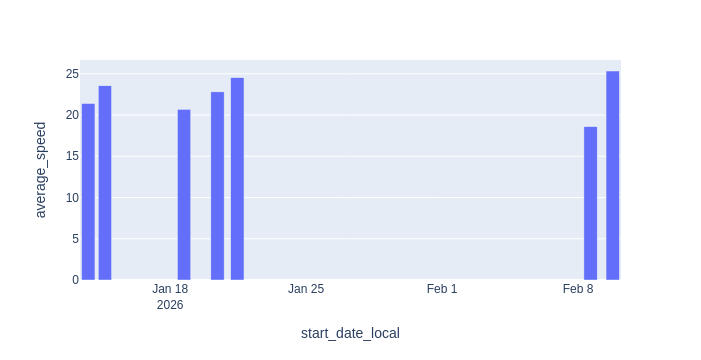

In [32]:
import plotly.express as px

df = sortedCurrentYear
fig2 = px.bar(df, x='start_date_local', y="average_speed")
#fig2.write_html("plotly_test.html")
fig2.show()

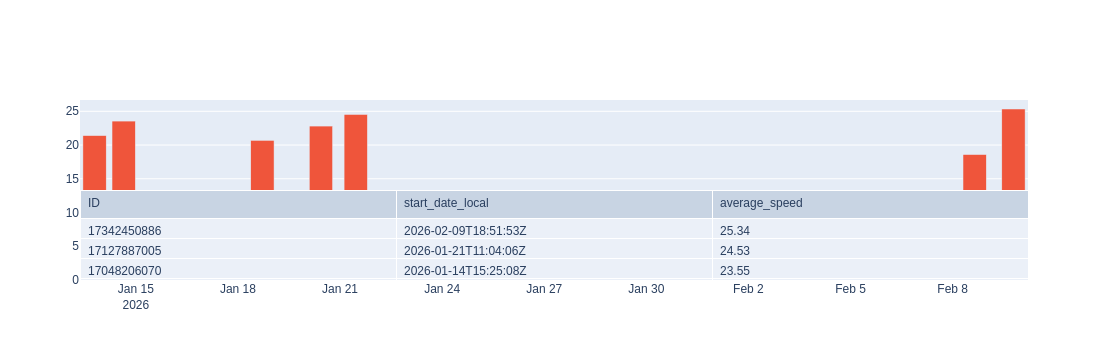

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
import pandas as pd
import numpy as np
from datetime import datetime


fig1 = go.Table(
    header=dict(values=["ID","start_date_local", "average_speed"],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.id, df.start_date_local, df.average_speed],
               #fill_color='lavender',
               align='left'),
    domain=dict(x=[0, 1],y=[0, 0.5]))

fig2 = go.Bar(x=df.start_date_local, y=df.average_speed)

layout = dict(xaxis1=dict( dict(domain=[0, 1], anchor='y1')),
             yaxis1=dict( dict(domain=[0.38, 1], anchor='x1')))
fig = go.Figure(data = [fig1,fig2])
fig.show()
fig.write_html("strava_analyse.html")
